## Ramon Brand - Session 3 - K-Fold
### Overview
The idea of this exercise is to use k-fold validation on the boston data set.

### Part 1 - Creating the model without k-fold
First we need to create a base model which does not use k-fold validation.

In [46]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import boston_housing

# -- Load data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# -- Normalize
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train -= mean
x_test -= mean
x_train /= (std * 2)
x_test /= (std * 2)

print(x_train.shape)
print(x_test.shape)

# -- Create model
model = Sequential()

# -- Layers
model.add(Dense(64, input_shape=(13,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
model.summary()

hist = model.fit(x_train, y_train, epochs=60, batch_size=32)

val_mse, val_mae = model.evaluate(x_test, y_test)

(404, 13)
(102, 13)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_68 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
404/404 [==============================] - 1s 1ms/step - loss: 560.1828 - mean_absolute_error: 21.7753
Epoch 2/60
404/404 [==============================] - 0s 124us/step - loss: 506.7860 - mean_absolute_error: 20.4630
Epoch 3/60
404/404 [==============================] - 0s 116us/step - loss: 442.0798 - mean_absolute_error: 18.8566
Epoch 4/60
404/404 [==================

Test Error:  2.837141523174211


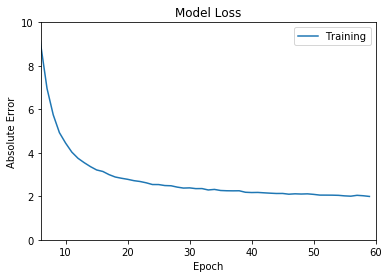

In [48]:
import matplotlib.pyplot as plt

print("Test Error: ", val_mae)

plt.plot(hist.history["mean_absolute_error"])
plt.xlim([6,60])
plt.ylim([0,10])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Absolute Error")
plt.legend(["Training"], loc="upper right")
plt.show()


**The above code is my own, however, reference was taken from the 'bostonhousinglinear' document on Oma and the model in 3.6.3 of Deep Learning with Python.**

Now we can move to implementing k-fold validation.

### Part 2 - Creating k-fold validation

(404, 13)
(102, 13)
Fold:  0
Epoch 1/20
270/270 [==============================] - 1s 3ms/step - loss: 566.6383 - mean_absolute_error: 22.0483
Epoch 2/20
270/270 [==============================] - 0s 115us/step - loss: 530.8448 - mean_absolute_error: 21.2068
Epoch 3/20
270/270 [==============================] - 0s 119us/step - loss: 493.3452 - mean_absolute_error: 20.2749
Epoch 4/20
270/270 [==============================] - 0s 119us/step - loss: 450.3629 - mean_absolute_error: 19.1899
Epoch 5/20
270/270 [==============================] - 0s 126us/step - loss: 400.1077 - mean_absolute_error: 17.9032
Epoch 6/20
270/270 [==============================] - 0s 122us/step - loss: 344.0556 - mean_absolute_error: 16.3864
Epoch 7/20
270/270 [==============================] - 0s 126us/step - loss: 286.7882 - mean_absolute_error: 14.6978
Epoch 8/20
270/270 [==============================] - 0s 133us/step - loss: 229.9127 - mean_absolute_error: 12.9010
Epoch 9/20
270/270 [=========================

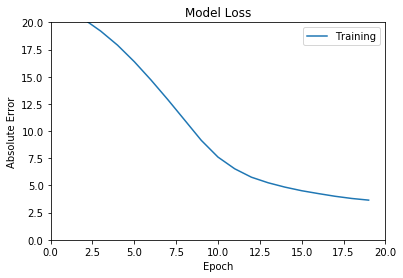

Fold:  1
Epoch 1/20
270/270 [==============================] - 0s 126us/step - loss: 26.3208 - mean_absolute_error: 3.4891
Epoch 2/20
270/270 [==============================] - 0s 130us/step - loss: 24.8775 - mean_absolute_error: 3.3226
Epoch 3/20
270/270 [==============================] - 0s 126us/step - loss: 23.2720 - mean_absolute_error: 3.2455
Epoch 4/20
270/270 [==============================] - 0s 122us/step - loss: 22.1597 - mean_absolute_error: 3.1720
Epoch 5/20
270/270 [==============================] - 0s 122us/step - loss: 20.9868 - mean_absolute_error: 3.0432
Epoch 6/20
270/270 [==============================] - 0s 126us/step - loss: 20.1051 - mean_absolute_error: 3.0033
Epoch 7/20
270/270 [==============================] - 0s 133us/step - loss: 19.3721 - mean_absolute_error: 2.9003
Epoch 8/20
270/270 [==============================] - 0s 119us/step - loss: 18.9234 - mean_absolute_error: 2.8788
Epoch 9/20
270/270 [==============================] - 0s 122us/step - loss: 17.

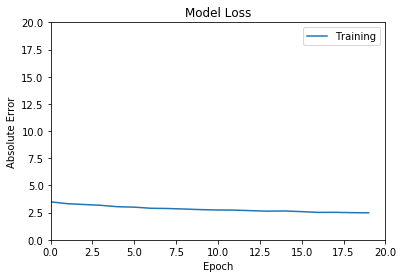

Fold:  2
Epoch 1/20
270/270 [==============================] - 0s 130us/step - loss: 11.3989 - mean_absolute_error: 2.4734
Epoch 2/20
270/270 [==============================] - 0s 126us/step - loss: 10.6182 - mean_absolute_error: 2.4193
Epoch 3/20
270/270 [==============================] - 0s 119us/step - loss: 10.3345 - mean_absolute_error: 2.3784
Epoch 4/20
270/270 [==============================] - 0s 122us/step - loss: 9.8943 - mean_absolute_error: 2.2871
Epoch 5/20
270/270 [==============================] - 0s 119us/step - loss: 9.6550 - mean_absolute_error: 2.3069
Epoch 6/20
270/270 [==============================] - 0s 119us/step - loss: 9.5619 - mean_absolute_error: 2.2651
Epoch 7/20
270/270 [==============================] - 0s 130us/step - loss: 9.3091 - mean_absolute_error: 2.2460
Epoch 8/20
270/270 [==============================] - 0s 122us/step - loss: 8.9739 - mean_absolute_error: 2.1879
Epoch 9/20
270/270 [==============================] - 0s 122us/step - loss: 8.8557 -

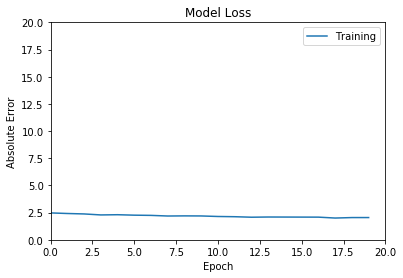

Mean Validation Error:  2.7863023856386024
102/102 [==============================] - 0s 49us/step


In [55]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import boston_housing

# -- Load data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# -- Normalize
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train -= mean
x_test -= mean
x_train /= (std * 2)
x_test /= (std * 2)

print(x_train.shape)
print(x_test.shape)

# -- Create model
model = Sequential()
# -- Layers
model.add(Dense(64, input_shape=(13,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

k = 3
validationSampleCount = len(x_train) // k
epochCount = 60
validationScores = []
for i in range(k):
    print("Fold: ", i)
    x_val = x_train[i * validationSampleCount : (i + 1) * validationSampleCount]
    y_val = y_train[i * validationSampleCount : (i + 1) * validationSampleCount]
    
    k_x_train = np.concatenate([x_train[: i * validationSampleCount], x_train[(i + 1) * validationSampleCount:]], axis=0)
    k_y_train = np.concatenate([y_train[: i * validationSampleCount], y_train[(i + 1) * validationSampleCount:]], axis=0)
    
    hist = model.fit(k_x_train, k_y_train, epochs=20, batch_size=32)
    
    val_mse, val_mae = model.evaluate(x_val, y_val)
    validationScores.append(val_mae)
    
    plt.plot(hist.history["mean_absolute_error"])
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.title("Model Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Absolute Error")
    plt.legend(["Training"], loc="upper right")
    plt.show()

meanError = np.mean(validationScores)
print("Mean Validation Error: ", meanError)

val_mse, val_mae = model.evaluate(x_test, y_test)


In [56]:
import matplotlib.pyplot as plt

print("Test Error: ", val_mae)

Test Error:  3.0239486974828385


The test error I received when not using k-fold was between 2.5 to 3.4, while the test error when using k-fold was between 2.7 - 3.0. I think the benifit is in the fact that the k-fold appears to be more stable and consistent, giving more predictable results.

I plotted the training loss in the k-fold training, and there seems to be a small section at the start of each fold where the network gets "spiked" with the new data.
